In [102]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [103]:
df= pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [104]:
#we dont need "Id"
df =df.drop(columns= ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [107]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [108]:
#for finding the null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

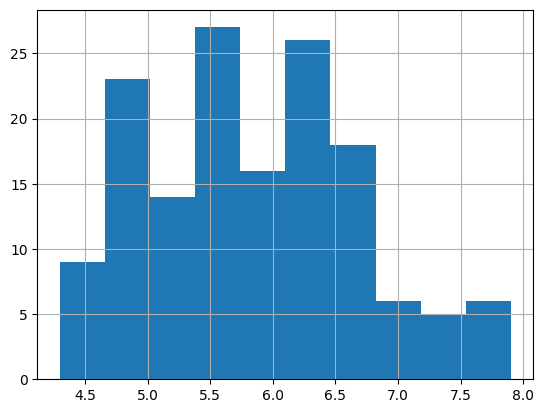

In [109]:
df['SepalLengthCm'].hist()

<Axes: >

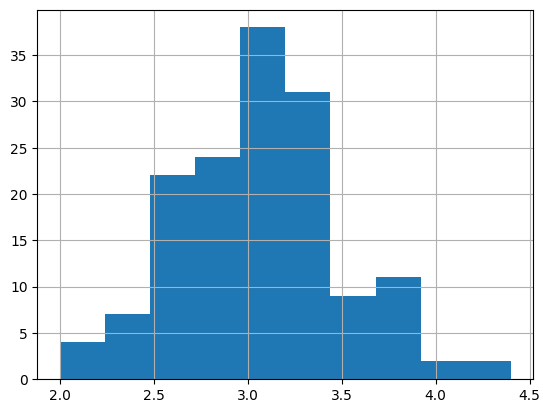

In [110]:
df['SepalWidthCm'].hist()

<Axes: >

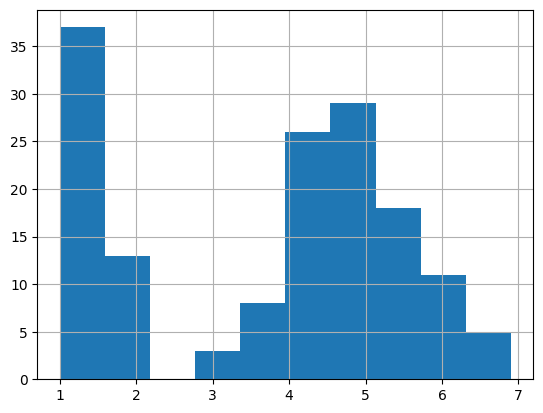

In [111]:
df['PetalLengthCm'].hist()

<Axes: >

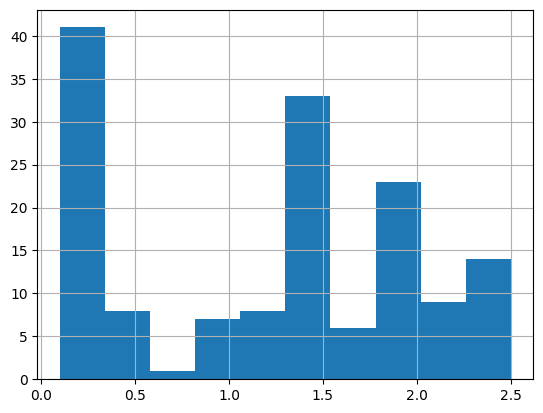

In [112]:
df['PetalWidthCm'].hist()

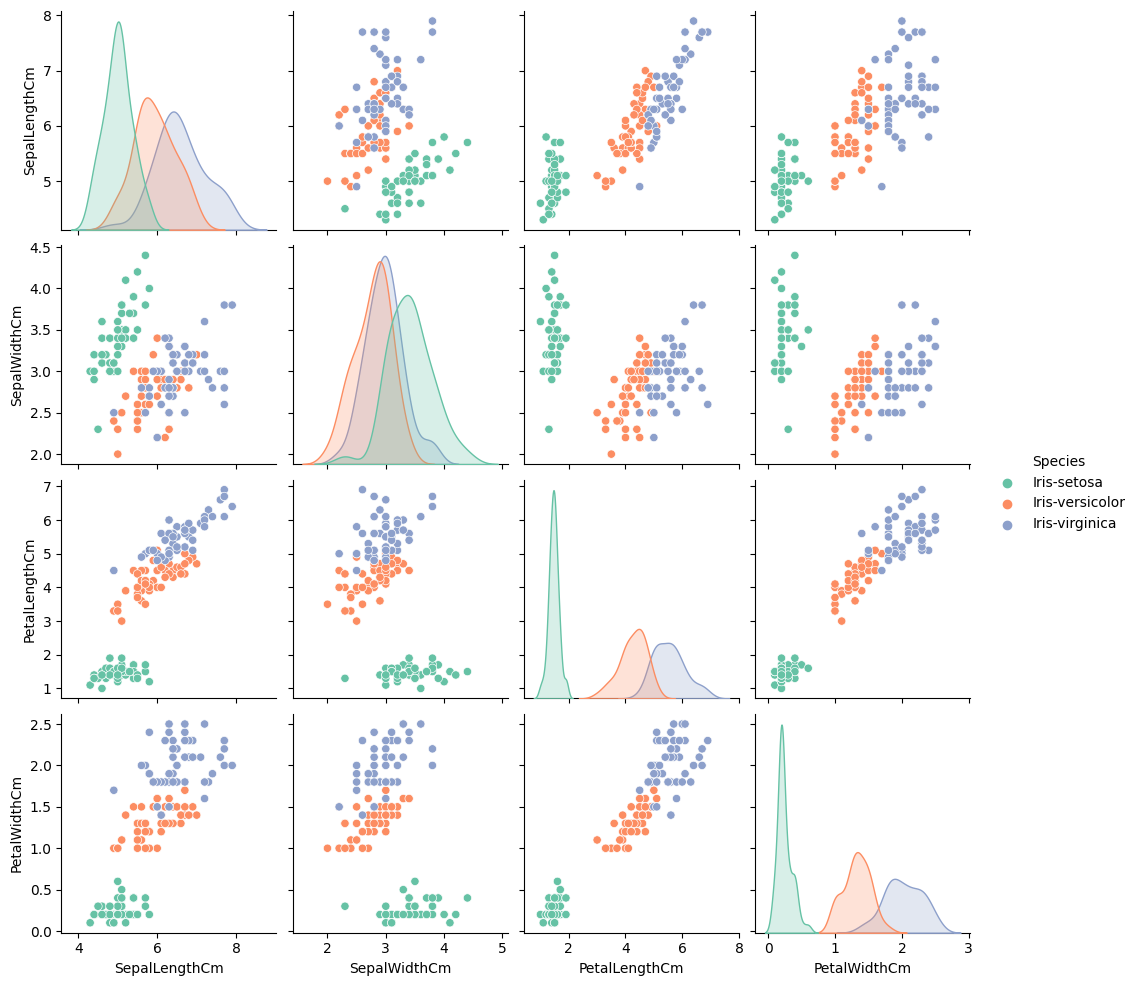

In [113]:
sns.pairplot(data=df,hue="Species",palette="Set2")
plt.show()

In [114]:
feat=df.iloc[:,[0,1,2,3]].values

In [115]:
w= []

for i in range(1, 11):
    kmeans = KMeans (n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
    kmeans.fit(feat)

    w.append(kmeans.inertia_)

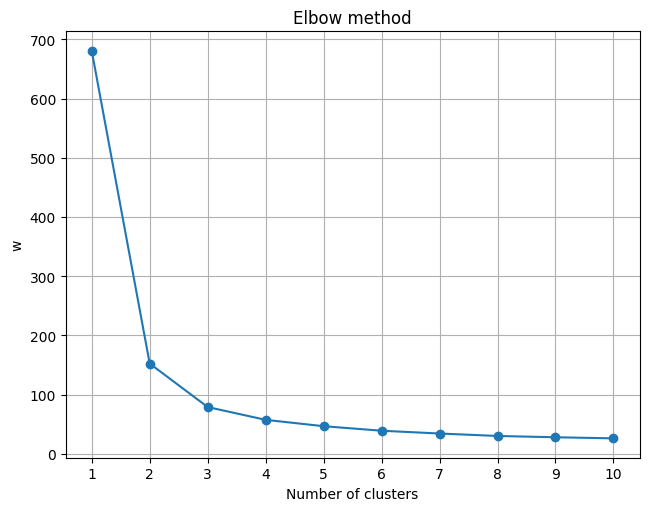

In [116]:
plt.plot(range(1, 11), w, "-o")

plt.grid(True)

plt.xticks(range(1,11))

plt.tight_layout()

plt.title('Elbow method')

plt.xlabel('Number of clusters')

plt.ylabel('w') 

plt.show()

In [117]:
k = KMeans(n_clusters = 3, init = "k-means++",
            max_iter = 388, n_init = 18, random_state = 0)
yk = k.fit_predict(feat)

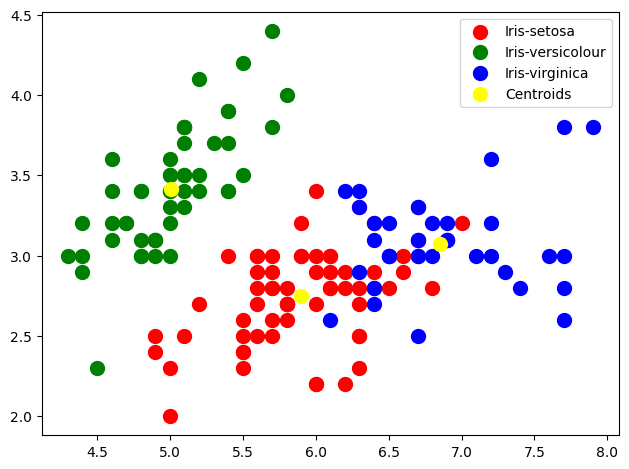

In [118]:
plt.scatter(feat[yk== 0, 0], feat[yk==0, 1], s=100, c ='red', label='Iris-setosa')
plt.scatter(feat[yk== 1, 0], feat[yk == 1, 1], s=100, c = 'green', label = 'Iris-versicolour') 
plt.scatter(feat[yk== 2, 0], feat[yk == 2, 1], s=100, c= 'blue', label = 'Iris-virginica') 

plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], s = 100, c = "yellow", label = "Centroids")

plt.tight_layout()

plt.legend()

In [119]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [120]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [121]:
model.fit(x_train, y_train)

LogisticRegression()

In [122]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


Thank you!!